# Titanic Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

#### About the dataset
From the dataset we can assume the following things:

1.Survived: 0 = No(Dead) and 1 = Yes(Survived)
2.Pclass=Passenger's class: 1 = Upper class, 2 = Middle class, 3 = Lower class
3.SibSp: It indicates the passenger's relation with siblings and Spouse.
4.Parch: It indicates the passenger's relation with parents.
5.Embarked: The ports of embarkations are C = Cherbourg, Q = Queenstown and S = Southampton.

In [1]:
#Importing neccesseary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df = pd.read_csv(r'titanic_train.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

The dataset contains both numerical and categorical data which are mentioned below.

Categorical features: In the dataset Survived, Sex and Embarked have categorical data also Pclass has the ordinal data.

Numerical features: Here Age and Fare are continuous data, SibSp and Parch are discrete data.

In [6]:
# Checking the types of the dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

This shows the number of unique values in each column.

## Checking for null values

In [9]:
# Checking null values in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

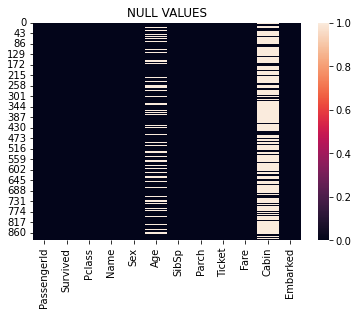

In [10]:
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

So we can see that the titanic set has so many of null values present in the columns Age, Cabin and Embarked.

In [11]:
# Checking the uniqueness of dataset
df['Survived'].unique()

array([0, 1], dtype=int64)

As we can see in the label there are two unique values that is 0 = No and 1 = Yes and this target variable has integer datatype.

In [12]:
# Checking count of number of survivors 
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can also observe that the data is not balanced.

In [13]:
# Checking wheather the dataset contains any space
df.loc[df['Survived']==" "]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


So it is clear that there are no space present in the dataset.

In [14]:
# Statistical summary of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the above description the mean of survived column is 0.38, but we cannot conclude on this basis since the dataset is not complete and Age column has count 714 which means there are some missing values in the dataset. We can also see the passenger's minimum age as 0.42 (which means a 4 months baby) years and maximum age is 80 years also the mean age is 29 years.

In the column Fare we can see somebody paid 512 dollars which is maximum amount and zero is the min. Also the some columns like Name, Sex, Ticket, Cabin and Embarked are not included in the describe method they are being removed since they have object datatype. In this describe method we get only continuous data information.

In summarizing the data we can also observe that the dataset seems to be having more outliers as well as skewness in the data. The column Age and Fare has huge outliers from the max of 80 and 512 respectively which is quite far from their mean with their second quantile median(50%).

# Data Visualization

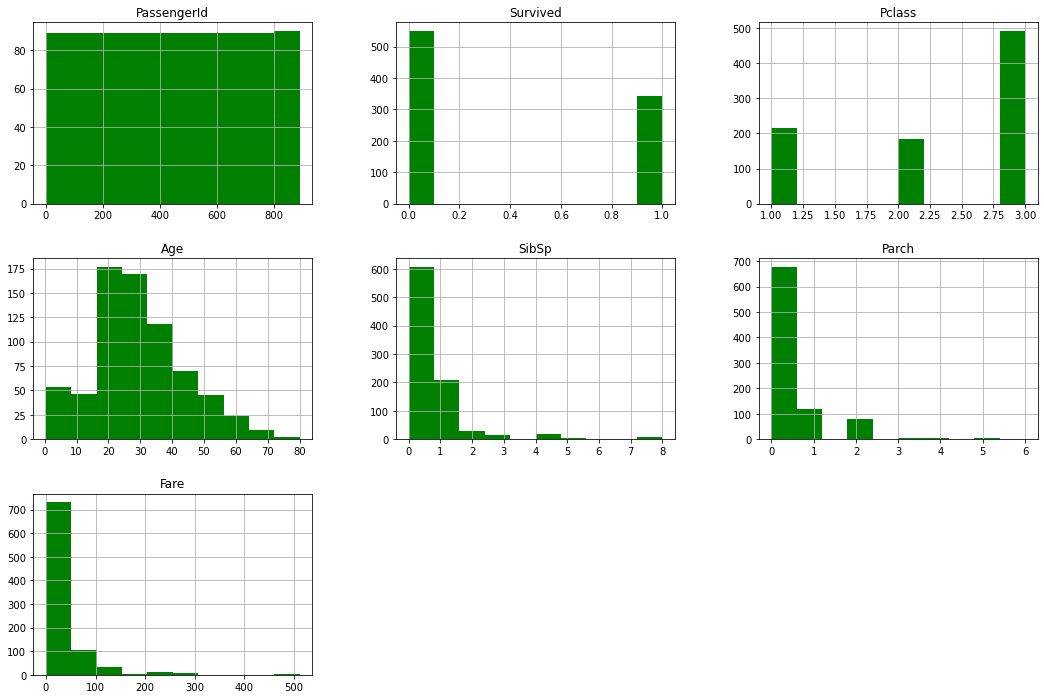

In [15]:
df.hist(figsize=(18,12), color ='g')
plt.show()

### Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


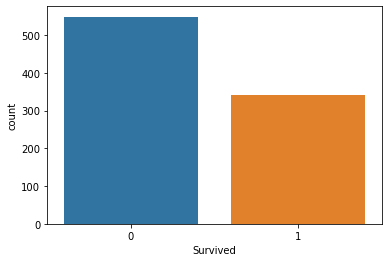

In [16]:
#Visualize the count of survivors
print(df["Survived"].value_counts())
sns.countplot(df["Survived"])
plt.show()

The label Survived has two classes 0 and 1. In this graph the passengers survived in this disaster are very less. Also we can clearly see that the data is not balanced. Since it is our target variable so we need to treat this class imbalancing issue using oversampling or downsamplimg before building our machine learning models.

3    491
1    216
2    184
Name: Pclass, dtype: int64


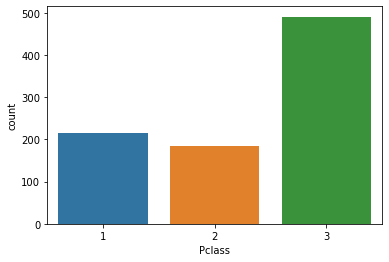

In [17]:
# Checking count of survival rate in the passenger class
print(df["Pclass"].value_counts())
sns.countplot(df["Pclass"])
plt.show()

Here the Pclass contains 3 value counts. On the basis of this plot we can say that the passengers travelling in 3rd(lower) class are more and they are not survived. 1st(Upper) class and 2nd(Middle) class passengers are more likely to survive. Also there are only few passengers are travelling in the 2nd class compare to the other two.

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

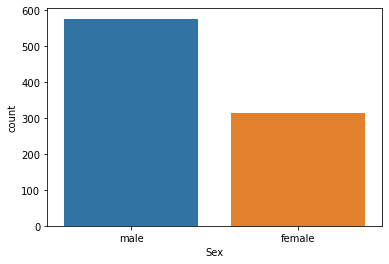

In [18]:
# Checking counts for Sex feature
print(df["Sex"].value_counts())
sns.countplot(df["Sex"])

Out of 891 passengers 577 are male and 314 are female. So by observing the data we can say that the survival rate of women passengers are more than men passengers.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


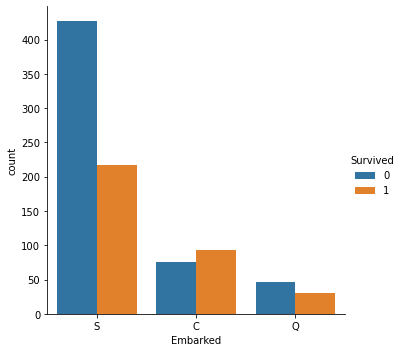

In [19]:
# Checking count in the Embarkation
print(df["Embarked"].value_counts())
sns.factorplot('Embarked',kind='count',data=df,hue='Survived')

Embarked feature has 3 value counts namely S=Southampton, C=Cherbourg and Q=Queenstown. These are the places where the passengers are boarded from. From the plot we can see that majority of passengers boarded from "S" and "Q" has less passengers.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


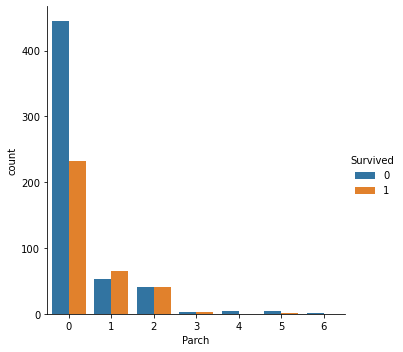

In [20]:
# Checking count in the Parch
print(df["Parch"].value_counts())
sns.factorplot('Parch',kind='count',data=df,hue='Survived')
plt.show()

From this plot we can see most of the passengers are travelled alone which is named as 0 in the plot. We can say almost 80% of the passengers are alone, 15% of the passengers are travelled either with their children or parents and remaining 5% of them are travelled with group.

## Bivariate Analysis

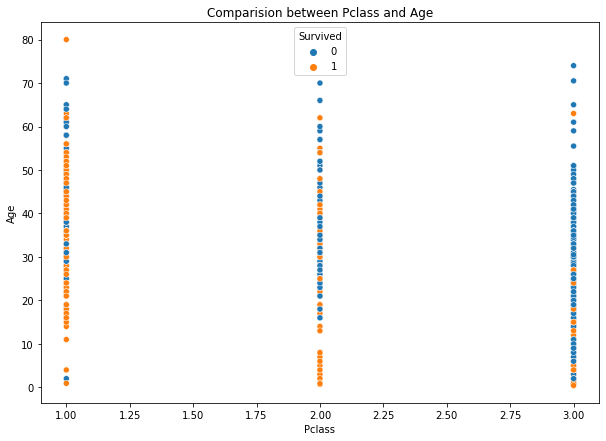

In [21]:
# Checking the relation between two variables
plt.figure(figsize=[10,7])
plt.title('Comparision between Pclass and Age')
sns.scatterplot(df['Pclass'],df['Age'],hue=df["Survived"])
plt.show()

This is the comparision between the Age and Pclass on the basis of target variable. Here orange dots are all the passengers who are survived and blue dots are the passengers who are dead. As we can see in the plot, the passengers travelled in the 1st(Upper) class who were aged 5 to 25 and 40 to 55 are survived. Most of the passengers who travelled in the 2nd(Middle) class whose age between 15 to 60 were dead and only few passengers survived. Most of the passengers of all the age, who were travelled in the 3rd class are dead compared to the other two classes.

<AxesSubplot:title={'center':'Comparision between Pclass and Sex'}, xlabel='Pclass', ylabel='Sex'>

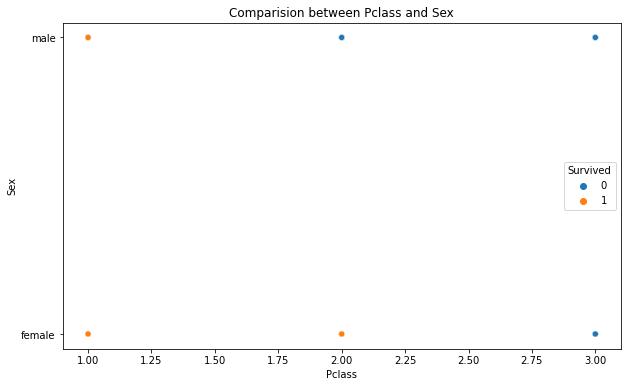

In [22]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(df['Pclass'],df['Sex'],hue=df["Survived"])

This plot gives the comparision between the Pclass and Sex. As we can see both male and female passengers who were in the 1st class were survived. In the 2nd class only female passengers were survived but not male. And in the 3rd class both male and female passengers were dead.

<AxesSubplot:title={'center':'Comparision between Age and Embarked'}, xlabel='Embarked', ylabel='Age'>

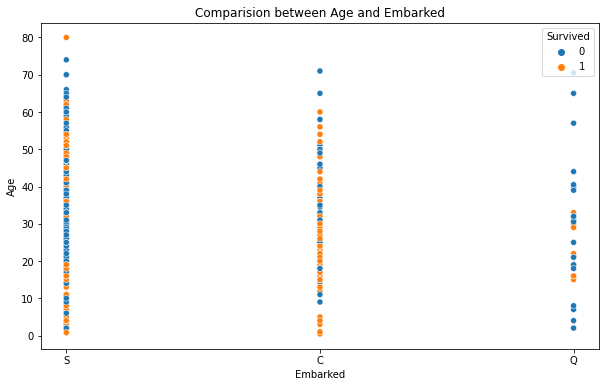

In [23]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Embarked')
sns.scatterplot(df['Embarked'],df['Age'],hue=df["Survived"])

The passengers who embarked for Southampton(S) (age between 20 to 40) are dead. Most of the passengers who embarked for Cherbourg(C) were survived compared to S and Q. And most of passengers died in Queenstown(Q) only few passengers survived who embarked for Queenstown(Q)

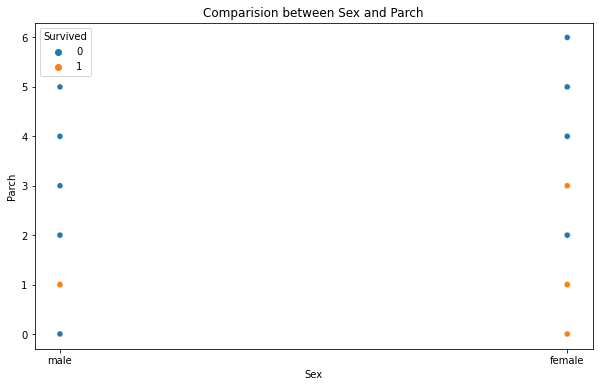

In [24]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Sex and Parch')
sns.scatterplot(df['Sex'],df['Parch'],hue=df["Survived"]);

The above plot gives the comparision between the features Sex and Parch on the basis of label Survived. Most of the passengers have the relation to each other. 

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

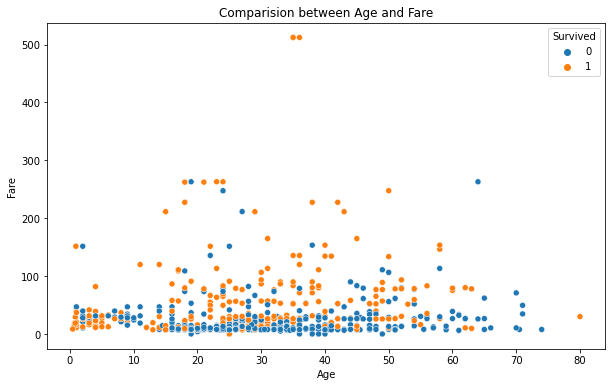

In [25]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(df['Age'],df['Fare'],hue=df["Survived"])

This gives the comparision between the Age and Fare on the basis of label Survived. Here the children(0-8 yrs) who paid less Fare have the high survival chance but for the passengers whose age is between 20 to 50 and paid more Fare their survival chance being increase. So it can be concluded that if a passenger paid a higher fare then the survival rate is more.

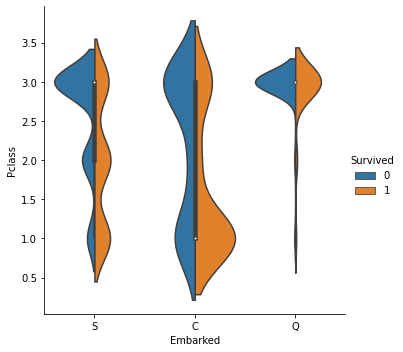

In [26]:
# Let's plot catplot for Embarked and Pclass
sns.catplot(x = "Embarked", y = "Pclass", hue = "Survived", kind = "violin", data=df, split=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

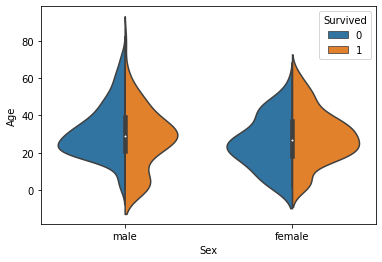

In [27]:
# Let's plot violinplot for Age and Sex
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

## Multivariate Analysis

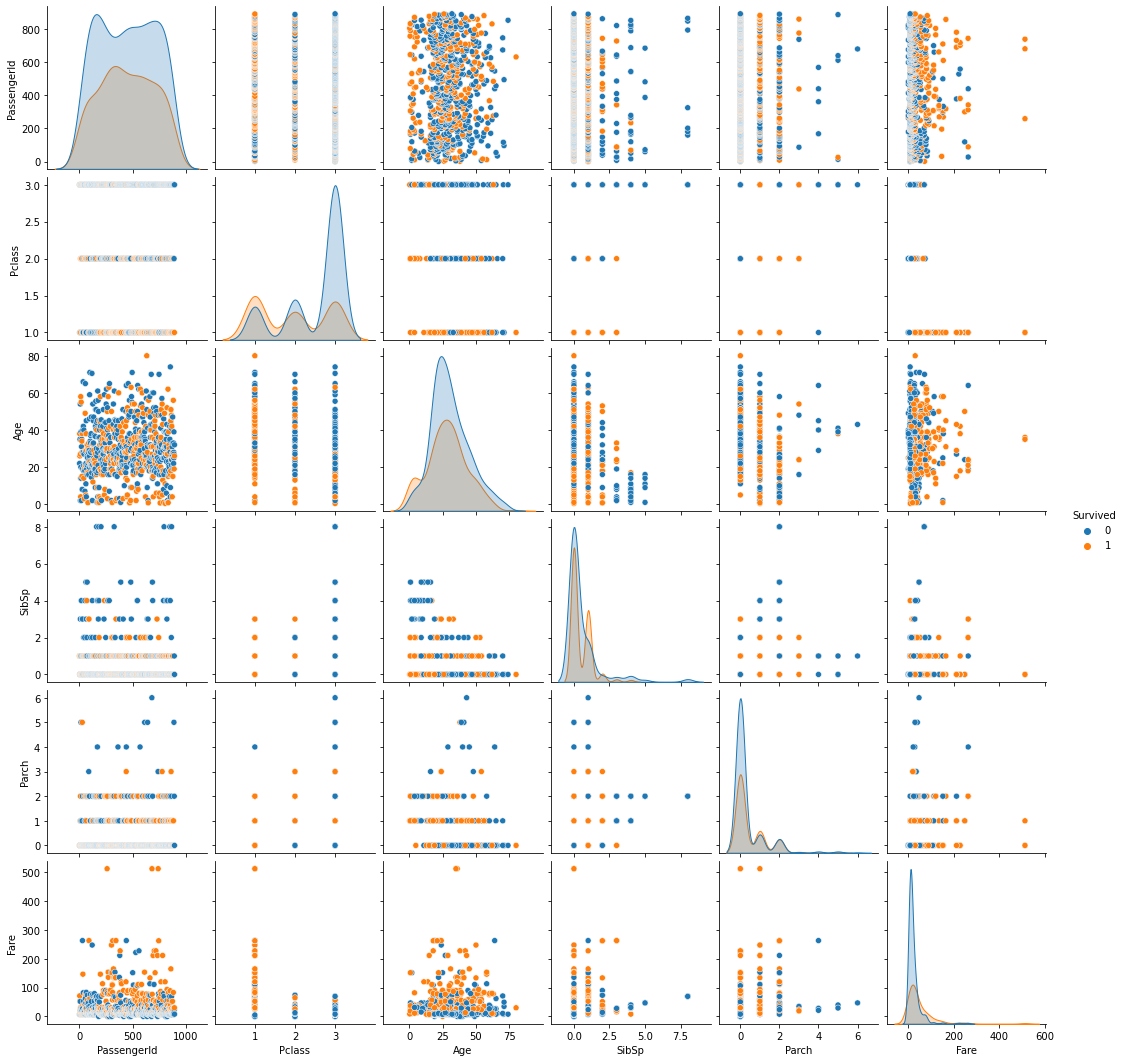

In [28]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Survived")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Survived'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. We can see the features Age and PassengerId are highly correlated but PassengerId has no more importance in our dataset so I am going to ignore it.

### Correlation between the target variable and independent variables using HEAT map

In [29]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


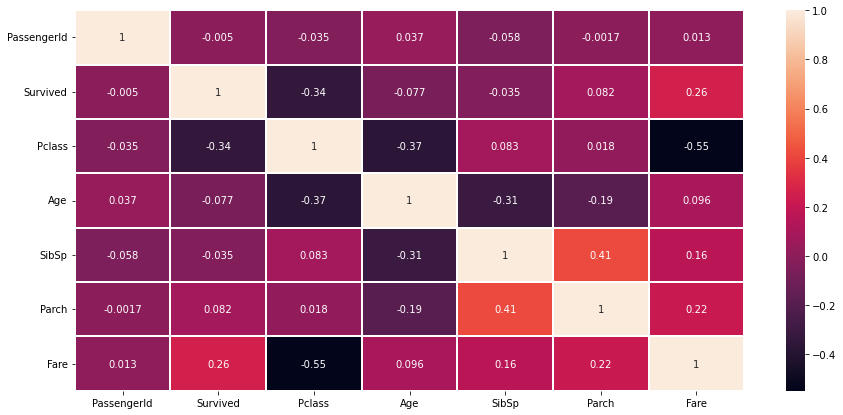

In [30]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

We can observe that the feature column Parch and Fare are positively correlated with the target variable "Survived". Pclass is highly negatively correlated with the target variable "Survived". Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. Light shades are highly correlated. Dark shades are less correlated. Also there are some independent variables which shows highly negative correlattion between each other. So we can check the multicollinearity problem using VIF.

Text(0.5, 1.0, 'correlation with target variable')

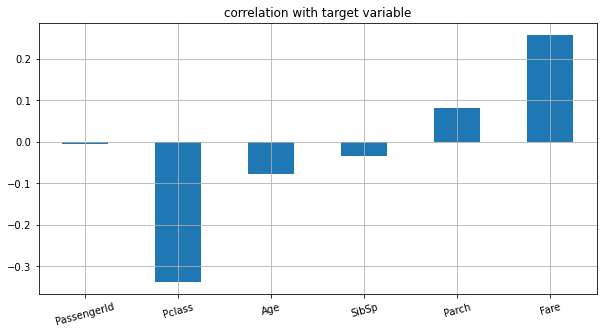

In [31]:
plt.figure(figsize=(10,5))
df.drop('Survived',axis=1).corrwith(df['Survived']).plot(kind='bar',grid=True)
plt.xticks(rotation=15)
plt.title('correlation with target variable')

Positively correlated
Fare,
Parch....
Negatively correlated
PassengerId,
SibSp,
Age,
Pclass.

Here we can easily observe the correlation.

## Dropping irrelevant column

In [32]:
# Dropping PassengerId column
df.drop(['PassengerId','Ticket'], axis=1, inplace = True )
df.drop('Name',axis=1, inplace=True) 

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


The dataframe after removing PassengerId column and Ticket column.

In [34]:
df.shape

(891, 9)

As we have seen in the statistical summary and pair plot, some columns contains outliers. Let's identify those outliers by plotting boxplot.

# Identifying the outliers

Survived        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Pclass       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Age          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
SibSp        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Parch          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Fare        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

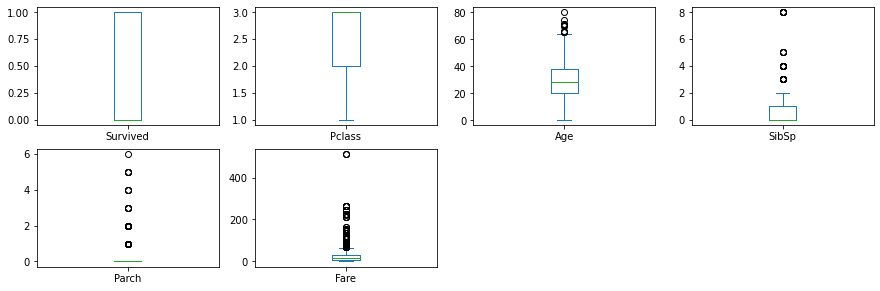

In [35]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

From the above boxplots we can observe that the outliers present in Age, Fare, SibSp and Parch. I am not going to remove outliers in the features SibSp and Parch since they are descrete data type. But We should remove the outliers in Age and Fare which are continuous data.

# Data Cleaning and preprocessing

#### Missing Value Treatment

In [36]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Let's treat the features Age, Cabin and Embarked which contains null values. Since the Age column is important, the missing values need to be filled.

Age is a numerical column and has outliers so I will use median method to fill the missing values.

Embarked is a categorical column so we can make use of mode methods to fill the missing values

Cabin column has alphanumerical values and has plenty of missing values so we can't use mean, media or mode method to fill them. So we can either delete that column or we can fill that out with unknown values by using fillna() method.

In [37]:
#using of fillna technique to impute the missing values

In [38]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df['Cabin'] = df['Cabin'].fillna('U')

In [39]:
#Chcking null values after filling them
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

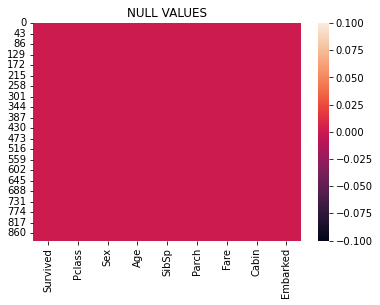

In [40]:
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

So we have filled the null values here. There are no null values exists and now our data is cleaned

## Removing Outliers 

##  Zscore method using Scipy

In [41]:
# Continuous features having outliers 
variables = df[['Age','Fare']]

These are the features which contains outliers

In [42]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,U,S


This is the new dataframe after removing the outliers.

In [43]:
df.shape

(891, 9)

In [44]:
new_df.shape

(864, 9)

The original dataset contains 891 rows and 9 columns. The new dataframe contains 864 rows and 9 columns.

In [45]:
# Let's check the the data loss
data_loss = (891-864)/891*100
data_loss

3.0303030303030303

This is the percentage loss of our data. Here I am not losing more data so I am removing the outiers.

## Checking for the skewness:

In [46]:
# Checking the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

We can observe the features Pclass, SibSp, Parch and Fare has skewness. Since Pclass is categorical column so we should not remove skewness. Let's remove skewness in Age, SibSp, Parch and Fare which contains numerical data

## Removing Skewness using power transform method

In [47]:
skewed_features = ["SibSp","Parch","Fare"]

In [48]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [49]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493


## Distribution after removing the skewness

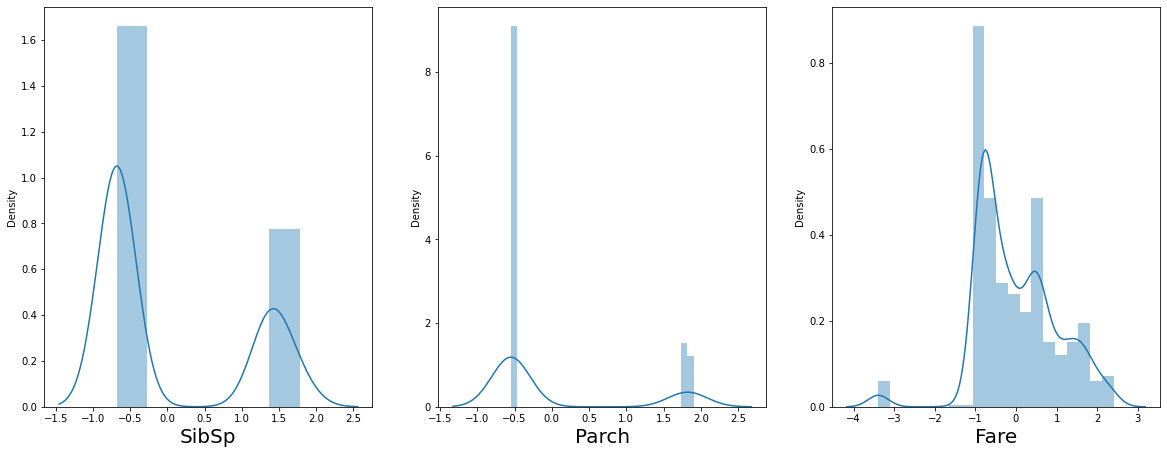

In [50]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25))
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

In [51]:
# Now let's check the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       0.805038
Parch       1.277888
Fare       -0.009095
dtype: float64

# Encoding the data using Label Encoding

In [52]:
cols = ["Sex", "Cabin", "Embarked"]

In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [54]:
new_df[cols].head()

,Sex,Cabin,Embarked
0,1,135,2
1,0,70,0
2,0,135,2
3,0,48,2
4,1,135,2


Now our caregorical data has been converted into the numerical data. Here we can see the unique value counts of all the encoded columns.

In [55]:
# Dataset after cleaning and encoding
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1.374574,-0.548637,-0.882769,135,2
1,1,1,0,38.0,1.374574,-0.548637,1.529038,70,0
2,1,3,0,26.0,-0.680931,-0.548637,-0.792444,135,2
3,1,1,0,35.0,1.374574,-0.548637,1.216581,48,2
4,0,3,1,35.0,-0.680931,-0.548637,-0.776493,135,2


## Splitting into X & Y variables

In [56]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [57]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1.374574,-0.548637,-0.882769,135,2
1,1,0,38.0,1.374574,-0.548637,1.529038,70,0
2,3,0,26.0,-0.680931,-0.548637,-0.792444,135,2
3,1,0,35.0,1.374574,-0.548637,1.216581,48,2
4,3,1,35.0,-0.680931,-0.548637,-0.776493,135,2


In [58]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

The data is not balanced. Since we have class imbalancing issue in the dataset so we need to balance it. Here I am using oversampling method to balance the class.

### Oversampling using the SMOTE
we use this to balance the target variable's minority class by adding some sysnthethic classes to the minority class to balance the target variable

In [59]:
# Balancing the data using oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [60]:
# Checking the value counts again
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

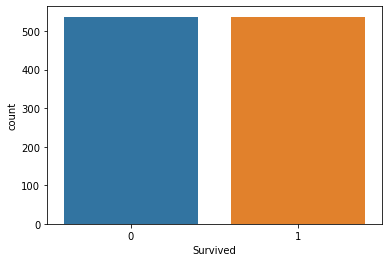

In [61]:
# Visualizing the data after oversampling
sns.countplot(y)

So we can observe clearly that the data is balanced in both the classes.

## Scaling data using Min-Max Scaler

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [63]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.432617,1.000000,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.848336,0.518519,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.448186,1.000000,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.794478,0.355556,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.450936,1.000000,1.0


This is our scaled data. By using min max scaler we can see that the values are between 0 and 1.

## Creation of the ML Model for prediction
Finding the best random state for removing the bias among all the models

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8637770897832817  on Random_state  24


## Creating train-test split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [66]:
x.shape, y.shape

((1074, 8), (1074,))

In [67]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((751, 8), (751,), (323, 8), (323,))

## Importing some base Classification Algorithms

In [68]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

### Decision Tree Classifier

In [69]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8606811145510835
[[150  17]
 [ 28 128]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       167
           1       0.88      0.82      0.85       156

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



Here we are getting 86% accuracy using Decision Tree Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

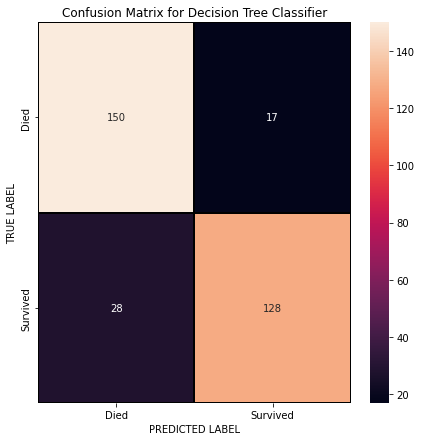

In [70]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

## Random Forest Classifier

In [71]:
RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8637770897832817
[[149  18]
 [ 26 130]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       167
           1       0.88      0.83      0.86       156

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



Here we are getting 86% accuracy using Random Forest Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

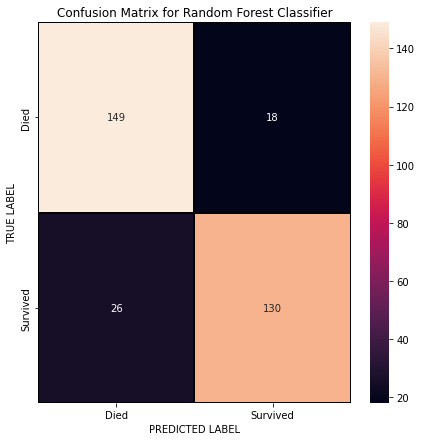

In [72]:
# Lets plot confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

## Support Vector Machine Classifier

In [73]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8142414860681114
[[147  20]
 [ 40 116]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       167
           1       0.85      0.74      0.79       156

    accuracy                           0.81       323
   macro avg       0.82      0.81      0.81       323
weighted avg       0.82      0.81      0.81       323



Here we are getting 81% accuracy using Support Vector Machine Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine CLassifier')

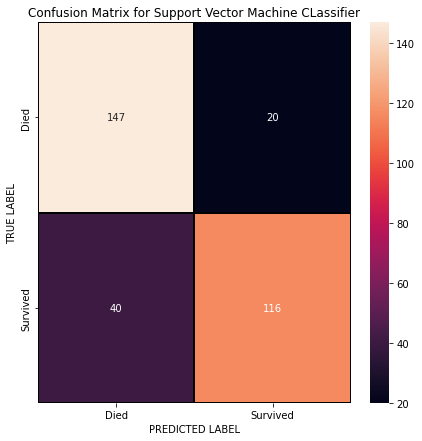

In [74]:
# Lets plot confusion matrix for SVC
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine CLassifier')

## Logistic Regression

In [75]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.826625386996904
[[140  27]
 [ 29 127]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       167
           1       0.82      0.81      0.82       156

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



Here we are getting 82% accuracy using Logistic Regression.

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

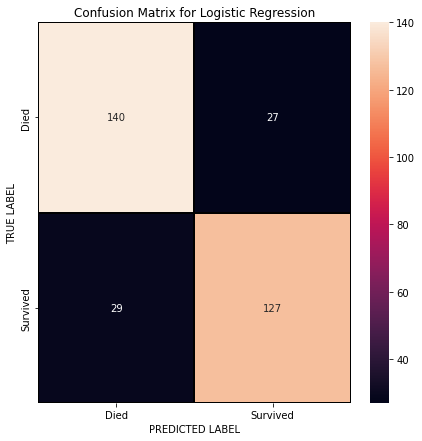

In [76]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

## KNN Classifier

In [77]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8142414860681114
[[136  31]
 [ 29 127]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       167
           1       0.80      0.81      0.81       156

    accuracy                           0.81       323
   macro avg       0.81      0.81      0.81       323
weighted avg       0.81      0.81      0.81       323



Here we are getting 81% accuracy using KNN Classifier.

Text(0.5, 1.0, 'Confusion Matrix for  KNN classifier')

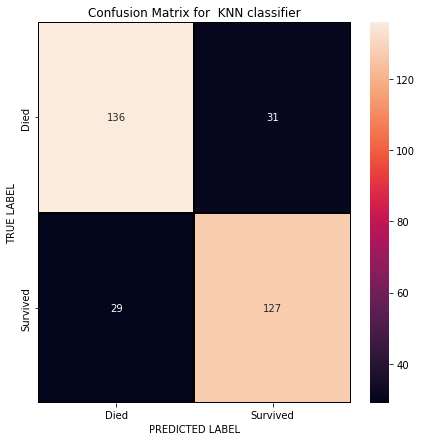

In [78]:
# Lets plot confusion matrix for KNN classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNN classifier')

# Gradient Boosting Classifier

In [79]:
GB = GradientBoostingClassifier(n_estimators =300,learning_rate=0.1, max_depth=4)
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8730650154798761
[[154  13]
 [ 28 128]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       167
           1       0.91      0.82      0.86       156

    accuracy                           0.87       323
   macro avg       0.88      0.87      0.87       323
weighted avg       0.88      0.87      0.87       323



Here we are getting 87% accuracy using Gradient Boosting Classifier.

Text(0.5, 1.0, 'Confusion Matrix for  Gradient Boosting classifier')

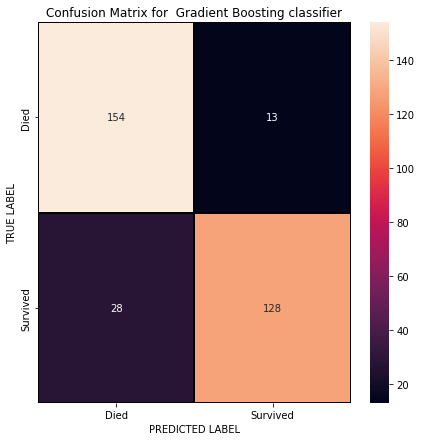

In [80]:
# Lets plot confusion matrix for Gradient Boosting classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Gradient Boosting classifier')

## Checking the Cross Validation Score for all the model

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
# cv score for Decision Tree Classifier
print('CV score  of Decision tree',cross_val_score(DTC,x,y,cv=7).mean())
# cv score for Random Forest Classifier
print('Cvscore  for Random forest',cross_val_score(RFC,x,y,cv=7).mean())
# cv score for Support Vector  Classifier
print('CV score  for the SVM',cross_val_score(svc,x,y,cv=7).mean())
# cv score for Logistic Regression 
print('CV score  for Logistic rgerssion',cross_val_score(LR,x,y,cv=7).mean())
# cv score for KNN Classifier
print('CV score   for the KNN',cross_val_score(knn,x,y,cv=7).mean())
# cv score for Gradient Boosting Classifier
print('Cv score  for  the Gradient boosting',cross_val_score(GB,x,y,cv=7).mean())

CV score  of Decision tree 0.8148410879503316
Cvscore  for Random forest 0.8418276401469679
CV score  for the SVM 0.7961487625353172
CV score  for Logistic rgerssion 0.794299537997017
CV score   for the KNN 0.8213345944438382
Cv score  for  the Gradient boosting 0.8390204566675157


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

### We are going with random forest model as it gave more accuracy while modelling
##### Hyper parameter tuning for best model using

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Random Forest Classifier
parameters = {'n_estimators':[0,200],
             'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [85]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'n_estimators': [0, 200]})

In [87]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 39,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'n_estimators': 200}

In [88]:
Titanic_survived = RandomForestClassifier(criterion='gini',max_depth=39, max_features='log2', max_leaf_nodes=40, n_estimators=200)
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.30650154798761


Here the final model gives 87% accuracy after tuning.

# Plotting ROC-AUC curve for best model

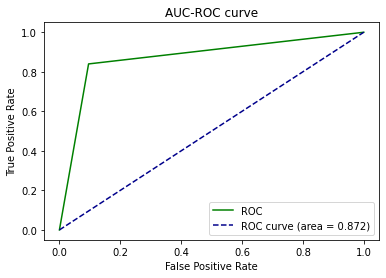

In [89]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)
plt.plot(fpr, tpr, color ='green', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('AUC-ROC curve')
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate.

So the best model has the area under curve as 0.87.

# Saving the model

In [90]:
import joblib

joblib.dump(Titanic_survived,'Titanic.obj')

['Titanic.obj']

# Prediction by the model

In [91]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Titanic_survived.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1,1
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
318,0,0
319,1,1
320,1,1
321,1,1


In [ ]:
# completed with good accuracy.